# 単回帰分析

グラフの表示対象となる関数を求める

●ライブラリのインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

C:\Users\takasaki\Anaconda3\envs\matplotlib\lib\site-packages\japanize_matplotlib\japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


## データ準備

### ●x,yに、3つのデータを入れる

In [2]:
# 気温
x = np.array([25,27,29])
# それぞれ、気温に対してアイスクリームが売れた個数とする
y = np.array([5,21,25])

###  散布図でデータを確認する。

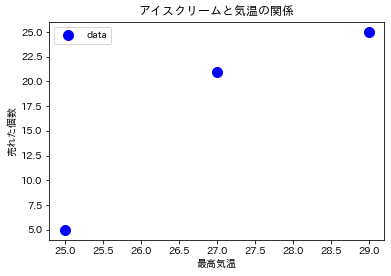

In [3]:
plt.scatter(x,y,s=100,c='blue',label= 'data')

plt.legend(loc='upper left')
plt.title('アイスクリームと気温の関係')    
plt.xlabel('最高気温')   
plt.ylabel('売れた個数')   
plt.show()

## ①「モデル」を決める

データの傾向から直線のモデルを求める　→どういったモデルとするのは人が決める。
$$\hat{y}= a x + b $$ 
$a$と$b$を求めるのがゴールとなる。
$\hat{y}$は、$y$の予測値という意味である。

## ②「評価関数」を決める。

モデルを元に予測した結果は、できるだけ正確な結果にしたい。 \
　⇒誤差を求めるための計算式が評価関数である。 \
 
今回は二乗誤差が小さくなるようにする。

$x=-2$の時に、正解（$y$）は$-12$、予測値（$\hat{y}$）は$-2a$ \
$x=0$の時に、正解（$y$）は$4$、予測値（$\hat{y}$）は$0$      \
$x=2$の時に、正解（$y$）は$8$、予測値（$\hat{y}$）は$2a$

上記から誤差 $s$ は下記の式となる。\
$$ \begin{aligned}
s &= (x=-2 の誤差)^2+(x=0 の誤差)^2+(x=2 の誤差)^2 \\
&= (-12+2a)^2+(4-0)^2+(8-2a)^2 \\
&= (144-48a+4a^2)+(16)+(64-32a+4a^2) \\
&= 8a^2-80a+224 \\
\frac{s}{8} &= a^2-10a+28
\end{aligned} $$

誤差が一番小さくなるような$a$を求める。\
（$s$ でも、$\frac{s}{8}$ でも最小値となる $a$ の値は変わらないため、$a^2-10a+28$ の結果で最小値になる値を求める。）

<function matplotlib.pyplot.show(*args, **kw)>

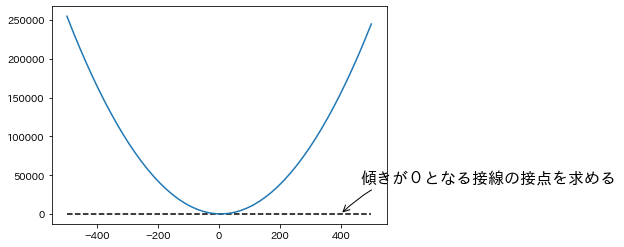

In [8]:
x1 = np.linspace(-500 , 500)
y1 = (x1 ** 2) - (10 * x1) + 28
plt.plot(x1 , y1)
plt.hlines([5],x1.min(),x1.max(), "black", linestyles='dashed')

plt.annotate('傾きが０となる接線の接点を求める',
             xy=(x1.max()-100 , 5), xycoords='data',
             xytext=(+20, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.3"))
plt.show

## ③「評価関数」を最小化する

### データの中心化

In [ ]:
print('x平均',x.mean())
print('y平均',y.mean())

In [29]:
# データの中心化
xc = x - x.mean()
yc = y - y.mean()
print('x中心化',xc)
print('y中心化',yc)

x中心化 [-2.  0.  2.]
y中心化 [-12.   4.   8.]


<function matplotlib.pyplot.show(*args, **kw)>

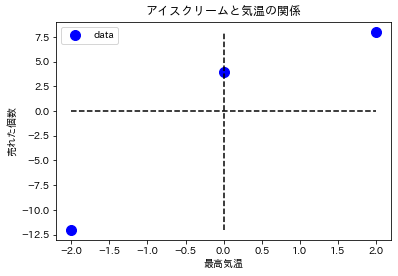

In [30]:
# 中心化後の散布図描画
plt.scatter(xc,yc,s=100,c='blue',label= 'data')
plt.hlines([0] ,xc.min() ,xc.max() , "black", linestyles='dashed')
plt.vlines([0] ,yc.min() ,yc.max() , "black", linestyles='dashed')

plt.legend(loc='upper left')
plt.title('アイスクリームと気温の関係')    
plt.xlabel('最高気温')   
plt.ylabel('売れた個数')   

plt.show

### 傾きを求める


$$ \begin{aligned}
\frac{s}{8} &= E  として、評価関数を\\
E &= a^2-10a+28　とする。
\end{aligned} $$

誤差を最小化するには、評価関数を微分して傾きが０になるような $a$ を求める。

$$ \begin{aligned}
\frac{d}{da}E &= \frac{d}{da}(a^2-10a+28) \\
&= 2a-10
\end{aligned} $$ 
誤差が最初というのは、$E$が 0 となるような$a$を求めるので、
$$ \begin{aligned}
0 &= 2a -10 \\
2a &= 10 \\
a &= \frac{10}{2} \\
&= 5
\end{aligned} $$

In [19]:
# 傾きの変数定義
a=5

実際は、過去のデータから、訓練データと検証データに分けて学習させる。\
例えば、2016年から2018年の3年分のデータからモデルを決める。\
2019年のデータを使って、モデルから求まった予測値と実際の結果の差異を誤差として評価関数を決めるというやり方をする。

### 切片を求める。

In [26]:
# 切片を求める
b=y.mean() - (a * x.mean())
print('切片',b)

切片 -118.0


# 予測する

In [35]:
# 予測値を返す関数
def predict(x , a ,b):
    # 予測値
    y_hat = a * x + b
    return y_hat

In [36]:
# 気温が26度の場合の予測値
print(predict(26 , a , b))

12.0


###  予測値を散布図にモデルを描画する。

[25 27 29]
[ 7. 17. 27.]


<function matplotlib.pyplot.show(*args, **kw)>

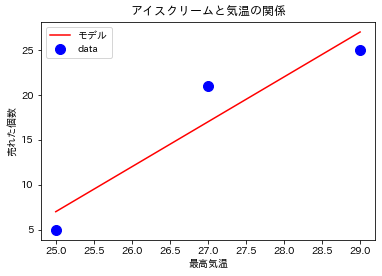

In [27]:
# 求まった傾きから、モデルを定義する
y_hat=a * x + b 
print(x)
print(y_hat)

# 散布図
plt.scatter(x,y,s=100,c='blue',label= 'data')
plt.plot(x , y_hat, c='red' ,label='モデル')
# plt.hlines([0],xc.min(),xc.max(), "black", linestyles='dashed')
# plt.vlines([0],yc.min(),y_hat.max(), "black", linestyles='dashed')

plt.legend(loc='upper left')
plt.title('アイスクリームと気温の関係')    
plt.xlabel('最高気温')   
plt.ylabel('売れた個数')   

plt.show